# Use Random Forest to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline 
from sklearn.preprocessing import LabelEncoder   
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import classification_report, confusion_matrix   
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Random Forest\Fraud_check.csv')
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Exploring the dataset

In [3]:
data.shape

(600, 6)

There are 600 instances and 6 variables

In [4]:
# checking summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


There are no missing values

In [5]:
# checking duplicates
data.duplicated().any()

False

No duplicates found

# 1. Categorical Variable

In [6]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical varaibles are :\n\n', categorical)

There are 3 categorical variables

The categorical varaibles are :

 ['Undergrad', 'Marital.Status', 'Urban']


In [7]:
data[categorical].head()

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO


In [8]:
# frequency counts of categorical variables
col_names = ['Undergrad', 'Marital.Status', 'Urban']
for col in col_names:
    
    print(data[col].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


# 2. Numerical Variable

In [9]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['Taxable.Income', 'City.Population', 'Work.Experience']


In [10]:
data[numerical].head()

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28


# Converting Categorial Variable to Numerical Variable

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1


In [12]:
# Renaming Taxable.Income to Income
data.rename({'Taxable.Income': 'Income'},inplace=True, axis=1)
data.columns

Index(['Undergrad', 'Marital.Status', 'Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [13]:
# Adding a column 'Result'
data['Result'] = data['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
data.head(2)

,Undergrad,Marital.Status,Income,City.Population,Work.Experience,Urban,Result
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good


In [14]:
# Converting Categorical Variable 'Result' to Numercial Variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Result'] = label_encoder.fit_transform(data['Result'])
data.head()

,Undergrad,Marital.Status,Income,City.Population,Work.Experience,Urban,Result
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [15]:
data['Result'].value_counts()

0    476
1    124
Name: Result, dtype: int64

Count of Good and Risky

# Data Visualisation

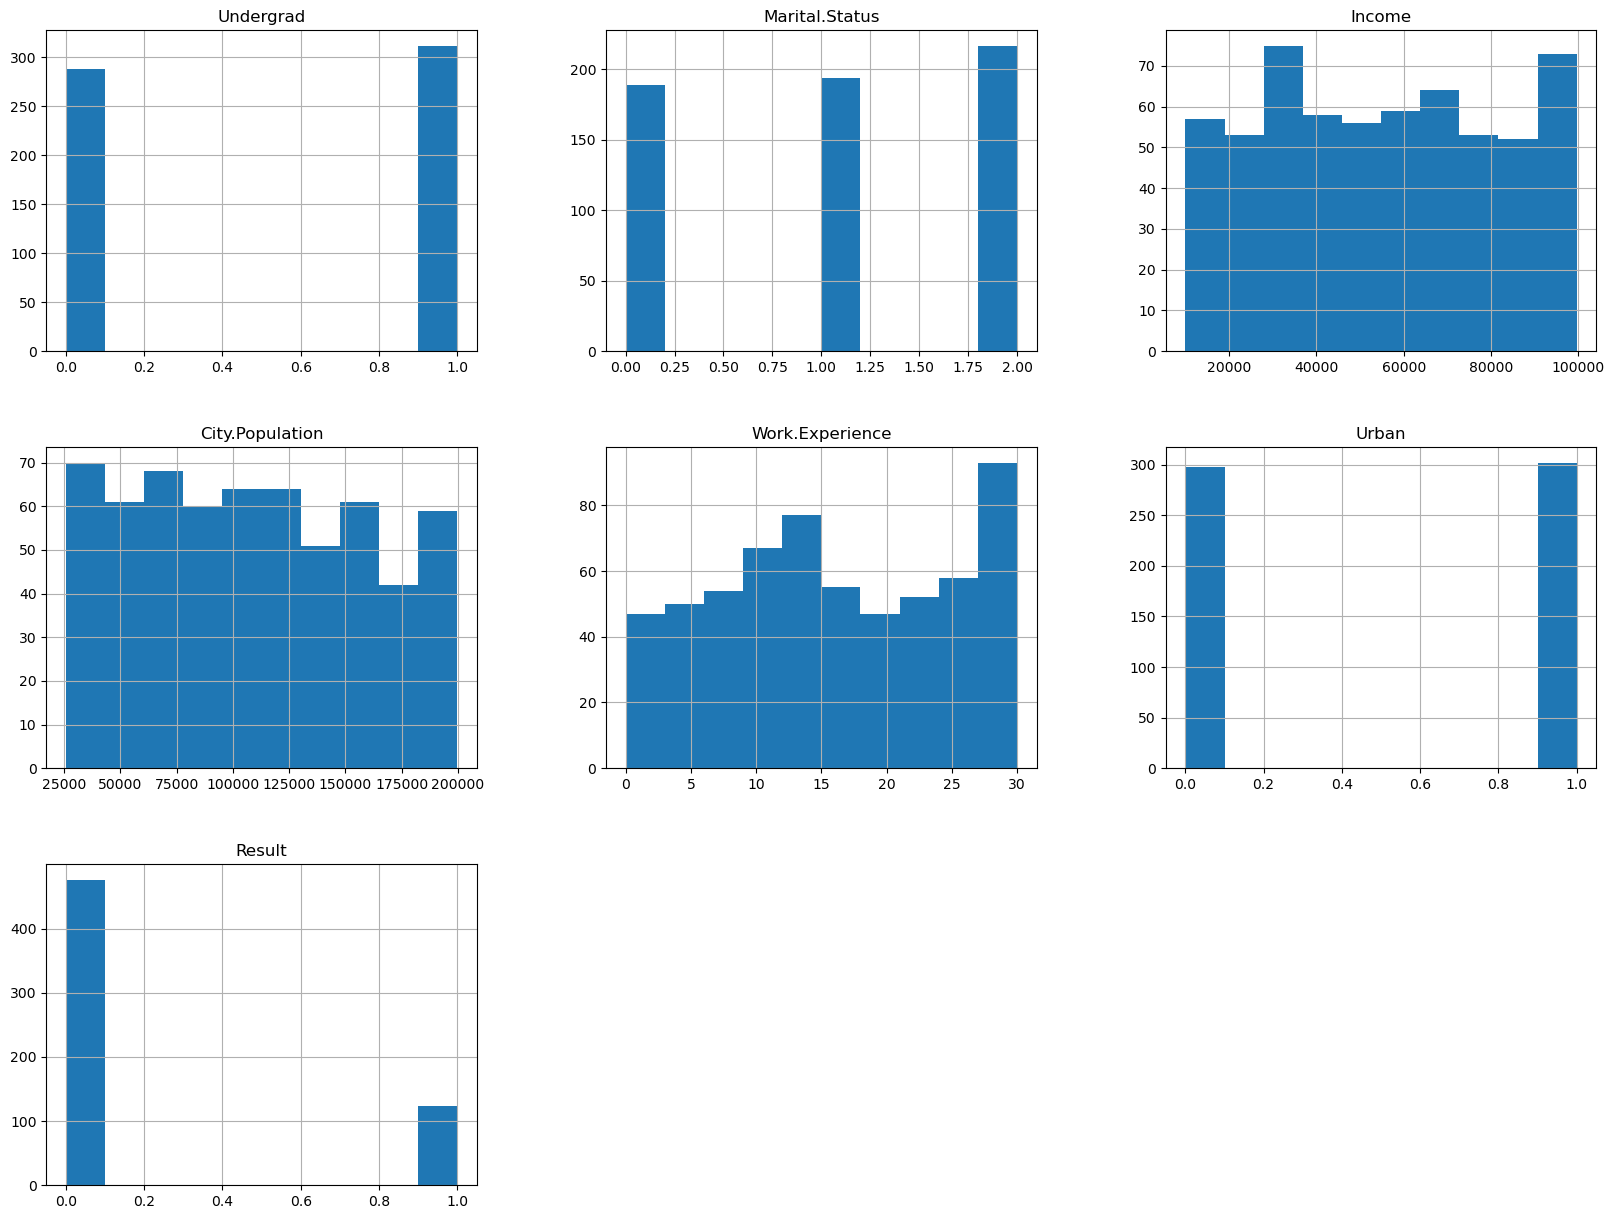

In [16]:
data.hist(figsize=(20,15))
plt.show()

<Axes: >

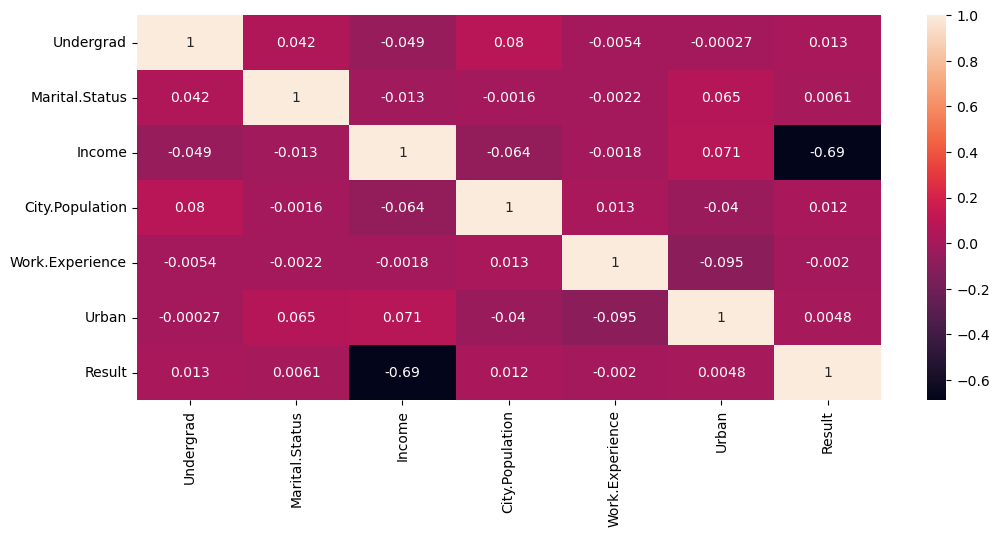

In [17]:
# correlation
import seaborn as sns
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

# Declaring Feature Vector and Target Variable 

In [18]:
x = data.iloc[:,0:5]
y = data['Result']

In [19]:
x.head(3)

,Undergrad,Marital.Status,Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30


In [20]:
y.head(3)

0    0
1    0
2    0
Name: Result, dtype: int32

# Split Data into Training and Testing Set

In [21]:
# spliting data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [22]:
# checking the shape of X_train and X_test
x_train.shape, x_test.shape

((420, 5), (180, 5))

In [23]:
# checking statistical data
data.describe()

,Undergrad,Marital.Status,Income,City.Population,Work.Experience,Urban,Result
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


There are huge differences in the mean among the features, so we will normalise it.

In [24]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train_scaled

array([[ 0.93541435, -0.09857599, -0.10978121,  0.23808829, -0.63366623],
       [-1.06904497,  1.11912739, -0.85420509,  0.34915242, -1.65032935],
       [-1.06904497, -1.31627937,  1.59604355,  0.97751647,  0.04410919],
       ...,
       [-1.06904497, -0.09857599, -0.93067495,  0.43238102, -1.19847908],
       [-1.06904497, -1.31627937,  1.4058444 ,  0.05701843, -1.31144165],
       [ 0.93541435, -1.31627937, -0.84674555, -0.34574289,  0.83484718]])

In [26]:
x_test_scaled

array([[-1.06904497,  1.11912739, -1.15679466, -1.5178923 ,  0.3829969 ],
       [-1.06904497, -0.09857599,  0.51536653,  0.57918262,  0.49595947],
       [-1.06904497, -1.31627937,  0.34869362, -1.54541016,  1.39966003],
       [ 0.93541435, -0.09857599, -0.89280343,  0.18746021,  1.17373489],
       [-1.06904497, -1.31627937, -0.96605995, -1.44510698,  0.49595947],
       [-1.06904497, -1.31627937, -1.49664367,  1.57802514,  0.72188461],
       [-1.06904497,  1.11912739, -0.95882993, -0.12508385,  0.3829969 ],
       [ 0.93541435,  1.11912739,  1.14946573, -0.86197069, -0.29477852],
       [ 0.93541435, -1.31627937,  0.71206888,  0.68002186, -1.76329192],
       [ 0.93541435, -1.31627937, -1.50360591, -0.72759779,  1.62558517],
       [ 0.93541435,  1.11912739, -1.33398743, -0.37598077,  0.04410919],
       [-1.06904497, -1.31627937, -0.95072007,  1.79227129, -0.63366623],
       [ 0.93541435, -0.09857599,  0.55189916,  1.38349416, -0.85959137],
       [ 0.93541435, -0.09857599,  1.1

# Random Forest Classifier model with default parameters

In [27]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

In [29]:
# fit the model
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [30]:
# Predicting the Test set results
y_pred = rfc.predict(x_test)

In [31]:
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with default parameter decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default parameter decision-trees : 1.0000


In [32]:
# Calculate the Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


# Random Forest Classifier Model with parameter n_estimators = 100

In [33]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [34]:
# fit the model to the training set
rfc_100.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(x_test)

In [36]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


Here, we see that the Accuracy of the Model is 100%

In [37]:
# viewing the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Income             0.952119
City.Population    0.026096
Work.Experience    0.013790
Marital.Status     0.005307
Undergrad          0.002688
dtype: float64

# Visualizing the feature scores of the features

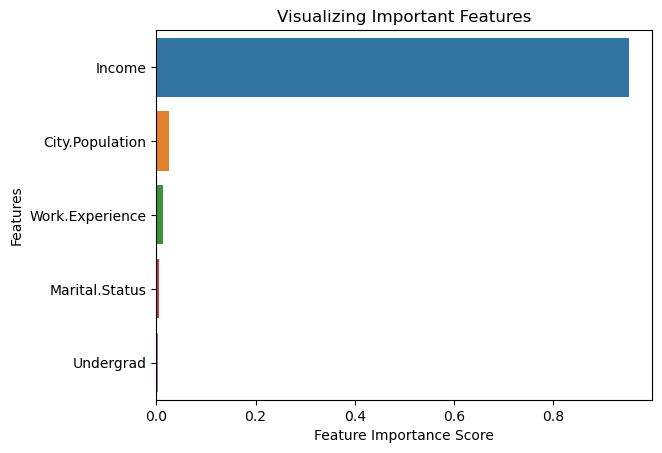

In [38]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# adding title to the graph
plt.title("Visualizing Important Features")

# visualizing the graph
plt.show()

Income proves to be the most important feature

# Confusion Matrix

In [39]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[143   0]
 [  0  37]]


# Classification Report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        37

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



Confusin Matrix and its metrices is found to be impressive with 100% accuracy rate.

# Conclusions:
1. Built and Trained a Random Forest Classifier Model to predict the Fraud.
2. Necessary EDA was carried out and visualized using the plot.
3. The performance of the model is excceptionally impressive, giving an accuracy of 1.00.
4. There was no requirement of extracting the features and rebuilding the model, since the accuracy was perfect.
5. The least important features of the Model such as Undergrad and Marital.status did not have have any imapact on the performance of the Model.
5. The accuracy score was also estimated using the confusion matrix and classification report and thus the Accuracy Score was perfect.
6. The performance of the Model is quite impressive and can be used to predict the Fraud.